In [4]:
import psi4

psi4.set_output_file('output.dat', False)

PosixPath('output.dat')

In [5]:
%%time

#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 297 ms, sys: 17.5 ms, total: 314 ms
Wall time: 337 ms


-76.0266327350902

In [7]:
%%time

#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 284 ms, sys: 10.8 ms, total: 295 ms
Wall time: 300 ms


-38.92533462893707

In [8]:
%%time

psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 860 ms, sys: 49.1 ms, total: 909 ms
Wall time: 1.08 s


-76.02703272937481

In [9]:
%%time 

scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

CPU times: user 1.02 s, sys: 46.2 ms, total: 1.06 s
Wall time: 1.11 s


In [10]:
%%time

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

psi4.set_options({'scf_type': 'df',
                  'freeze_core': True})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 3.97 s, sys: 322 ms, total: 4.29 s
Wall time: 4.42 s


-0.0022355823909805178

In [11]:
%%time 

#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.77 s, sys: 1.56 s, total: 7.32 s
Wall time: 11 s


In [13]:
%%time 

# Argon

#! Example potential energy surface scan and CP-correction for Ar2

ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
# psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
# psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
# psi4.core.print_out("---------------------------------------------------------\n")
# for R in Rvals:
#     e = ecp[R] * psi4.constants.hartree2kcalmol
#     psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.8                        -0.069454
            4.0                        -0.122889
            4.2                        -0.116450
            4.5                        -0.095152
            4.8                        -0.073689
            5.0                        -0.055968
            5.2                        -0.042323
            5.5                        -0.032099
            5.8                        -0.024511
            6.0                        -0.018882
CPU times: user 1min 6s, sys: 7.01 s, total: 1min 13s
Wall time: 1min 15s


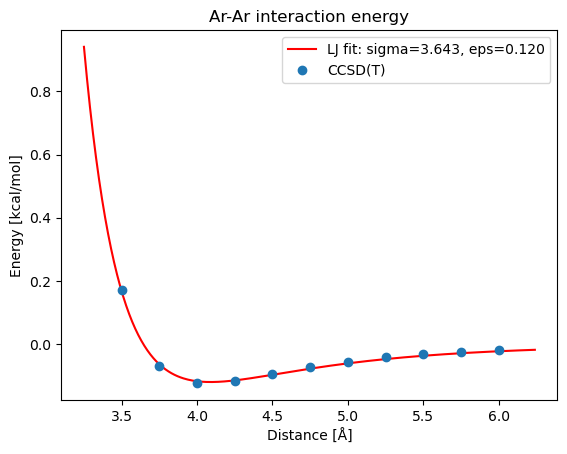

In [31]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

xdata = Rvals
ydata = [ecp[R]*psi4.constants.hartree2kcalmol for R in Rvals]

popt, pcov = curve_fit(lj, xdata, ydata)

x_plot = np.arange(3.25, 6.25, 0.01)

plt.plot(x_plot, lj(x_plot, *popt), 'r-',
         label='LJ fit: sigma=%5.3f, eps=%5.3f' % tuple(popt))
plt.plot(xdata,ydata,'o',label='CCSD(T)')
plt.xlabel('Distance [Å]')
plt.ylabel('Energy [kcal/mol]')
plt.title('Ar-Ar interaction energy')
plt.legend()

plt.savefig('Figures/ar_ar_E.jpg')